# Libraries 

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval
from statsFuncs import compDistributions
import scipy
import random

mpl.rcParams['axes.linewidth'] = 2

import numpy as np
from scipy.integrate import cumtrapz
from scipy.stats import norm
from matplotlib import pyplot as plt


# Paths 

In [113]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
datapath = figures_path + '/data/radiologists/Analysis5_22_2020/'

# Plot params 

In [114]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject params 

In [115]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

96 files, 15 folders
14 subjects


In [116]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 'SuperSubject']

# Plot histograms 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


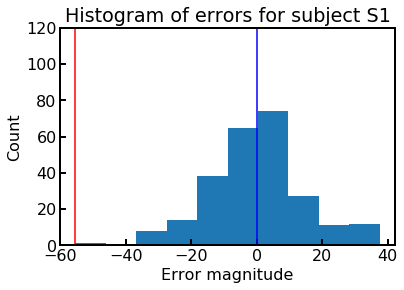

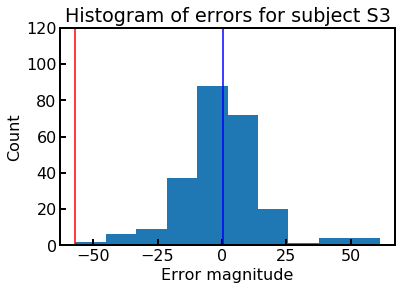

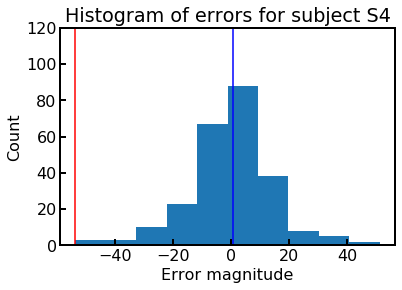

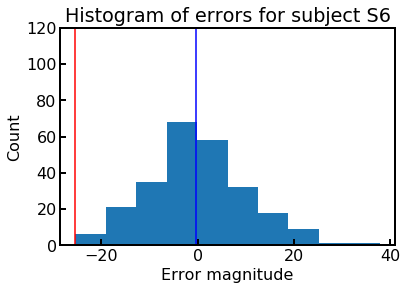

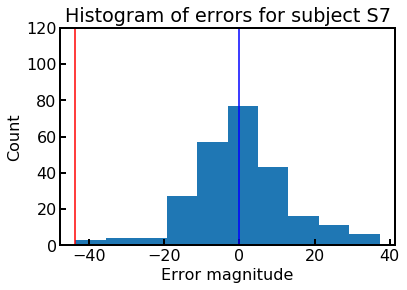

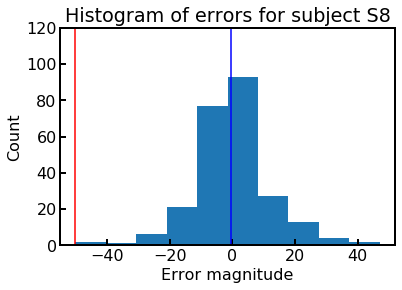

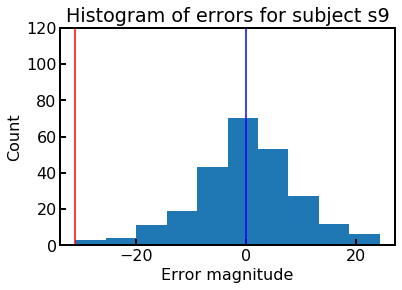

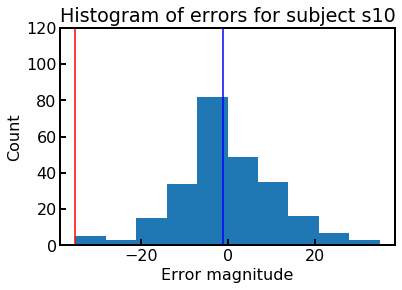

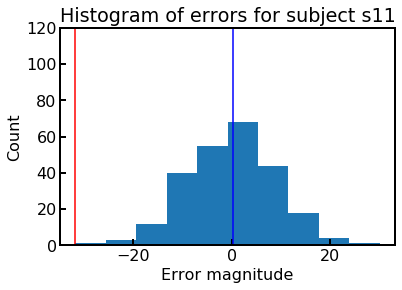

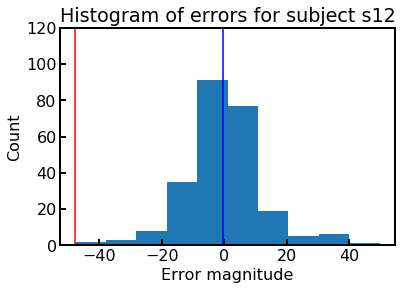

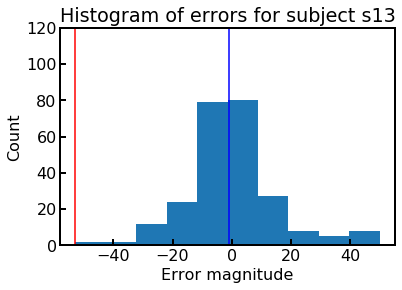

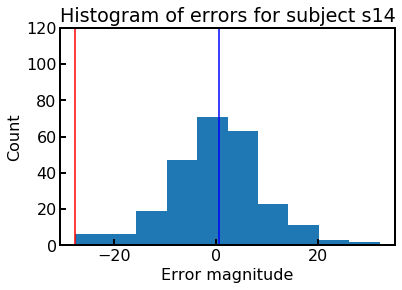

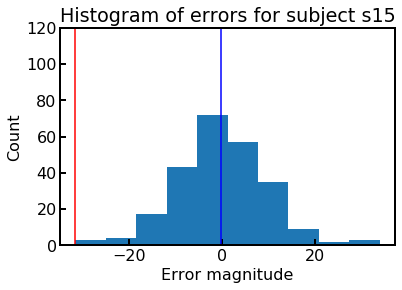

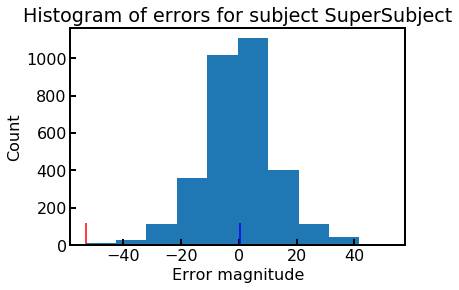

In [117]:
df_percentiles = pd.DataFrame(columns=['SUBJECT','0TH','50TH'])
alldata = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])

row = 0
for subject in subject_names:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    df_percentiles.loc[row,'SUBJECT'] = subject
    df_percentiles.loc[row,'0TH'] = np.percentile(np.asarray(subjectdata['responseError'].dropna()), 0)
    df_percentiles.loc[row,'50TH'] = np.percentile(np.asarray(subjectdata['responseError'].dropna()), 50)
    plt.hist(subjectdata['responseError'])
    plt.vlines(df_percentiles.loc[row,'0TH'], 0, 120, color='red')
    plt.vlines(df_percentiles.loc[row,'50TH'], 0, 120, color='blue')
    plt.xlabel('Error magnitude')
    plt.ylabel('Count')
#     plt.xlim([-1, 74])
    if subject != 'SuperSubject':
        plt.ylim([0, 120])
    plt.title('Histogram of errors for subject ' + subject)
    plt.show()

    
    row += 1

In [118]:
df_percentiles['DIFFERENCE'] = df_percentiles['50TH'] - df_percentiles['0TH']

In [119]:
df_percentiles

,SUBJECT,0TH,50TH,DIFFERENCE
0,S1,-55.4221,0.0712958,55.4934
1,S3,-56.939,0.251412,57.1904
2,S4,-53.4802,0.541894,54.0221
3,S6,-25.3782,-0.362259,25.0159
4,S7,-43.6266,-0.239797,43.3868
5,S8,-50.0305,-0.425477,49.605
6,s9,-31.069,0.0500185,31.1191
7,s10,-35.1106,-1.11457,33.9961
8,s11,-31.7595,0.202695,31.9622
9,s12,-47.6616,-0.441595,47.22


Text(0.5, 1.0, '50th-0th percentile of response error per subject + supersubject')

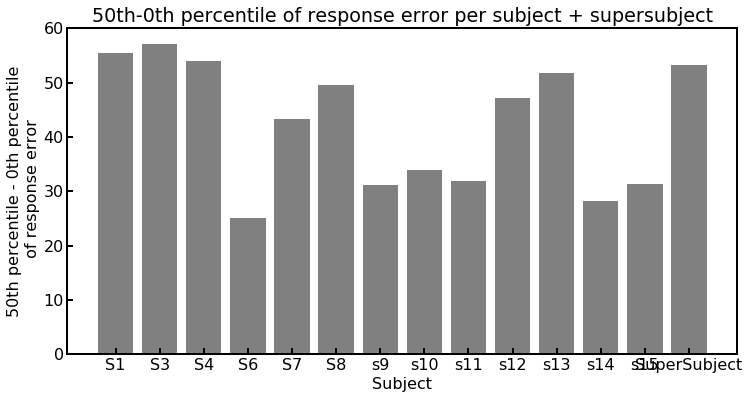

In [120]:
plt.figure(figsize=(12,6))
plt.bar(df_percentiles['SUBJECT'],  df_percentiles['DIFFERENCE'], color='gray')
plt.ylabel('50th percentile - 0th percentile\n of response error')
plt.xlabel('Subject')
plt.title('50th-0th percentile of response error per subject + supersubject')

# New JND calculation 

In [121]:
alldata = pd.DataFrame()
row = 0
for subject in subject_names:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    alldata[subject] = subjectdata.loc[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84), 'responseError']

    
    row += 1

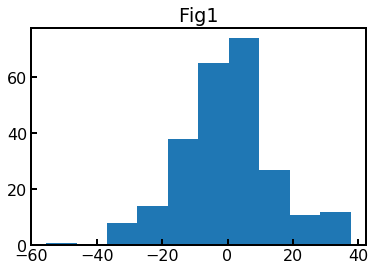

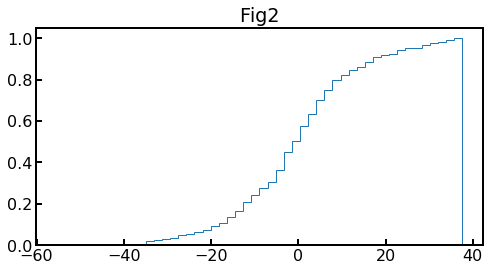

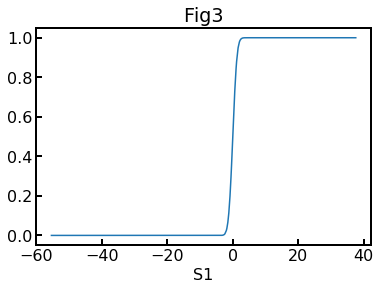

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


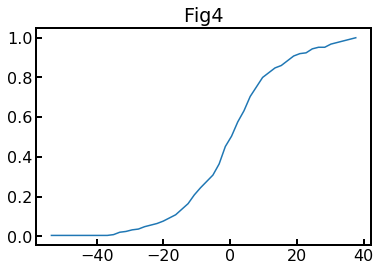

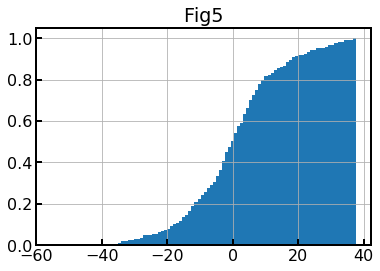

In [122]:
n_bins = 50
plt.hist(alldata['S1'])
plt.title('Fig1')
plt.show()
fig, ax = plt.subplots(figsize=(8, 4))

n, bins, patches = ax.hist(alldata['S1'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.title('Fig2')

plt.show()

norm_cdf = scipy.stats.norm.cdf(alldata['S1']) # calculate the cdf - also discrete

# plot the cdf
sns.lineplot(x=alldata['S1'], y=norm_cdf)
plt.title('Fig3')

plt.show()

counts, bin_edges = np.histogram (alldata['S1'], bins=n_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])
plt.title('Fig4')

plt.show()
alldata['S1'].hist(cumulative=True, density=1, bins=100)
plt.title('Fig5')

plt.show()

In [123]:
n

array([0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.008, 0.02 , 0.024, 0.032, 0.036, 0.048, 0.056, 0.064,
       0.076, 0.092, 0.108, 0.136, 0.164, 0.208, 0.244, 0.276, 0.308,
       0.364, 0.452, 0.504, 0.576, 0.632, 0.704, 0.752, 0.8  , 0.824,
       0.848, 0.86 , 0.884, 0.908, 0.92 , 0.924, 0.944, 0.952, 0.952,
       0.968, 0.976, 0.984, 0.992, 1.   ])

In [124]:
cdf

array([0.00215016, 0.00215016, 0.00215016, 0.00215016, 0.00215016,
       0.00215016, 0.00215016, 0.00215016, 0.00215016, 0.00215016,
       0.00430031, 0.01075078, 0.01290093, 0.01720125, 0.0193514 ,
       0.02580187, 0.03010218, 0.03440249, 0.04085296, 0.04945358,
       0.0580542 , 0.07310529, 0.08815638, 0.1118081 , 0.1311595 ,
       0.14836074, 0.16556199, 0.19566417, 0.2429676 , 0.27091962,
       0.30962242, 0.3397246 , 0.37842741, 0.40422927, 0.43003114,
       0.44293208, 0.45583301, 0.46228348, 0.47518441, 0.48808535,
       0.49453581, 0.49668597, 0.50743675, 0.51173706, 0.51173706,
       0.52033768, 0.52463799, 0.52893831, 0.53323862, 0.53753893])

In [158]:
cdf = alldata['S1'].value_counts().sort_index().cumsum() / alldata['S1'].shape[0]
cdf

-55.422080    0.004
-35.363278    0.008
-34.506615    0.012
-33.413124    0.016
-33.355329    0.020
              ...  
 33.012205    0.984
 33.897536    0.988
 34.473975    0.992
 36.877072    0.996
 37.594439    1.000
Name: S1, Length: 247, dtype: float64

In [ ]:
first_line = np.percentile(np.sort(cdf.index), 25) 
second_line = np.percentile(np.sort(cdf.index), 75) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


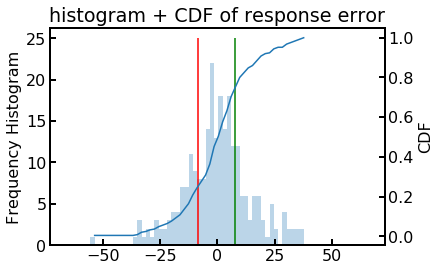

In [148]:
fig,ax = plt.subplots()
ax.hist(alldata['S1'], alpha=0.3, bins=50)
ax.set_xlim([-73, 73])
ax.set_ylabel('Frequency Histogram')
ax.vlines(first_line, 0, 25, color='red')
ax.vlines(second_line, 0, 25, color='green')

ax2=ax.twinx()

counts, bin_edges = np.histogram (alldata['S1'], bins=n_bins, normed=True)
cdf = np.cumsum (counts)
ax2.plot (bin_edges[1:], cdf/cdf[-1])
ax2.set_title('histogram + CDF of response error')
ax2.set_xlim([-73, 73])
ax2.set_ylabel('CDF')
plt.xlabel('Respose Error')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


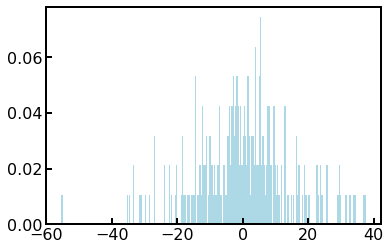

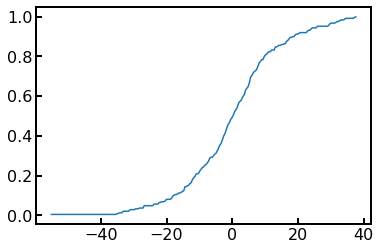

In [128]:
hx, hy, _ = plt.hist(alldata['S1'], bins=247, normed=1,color="lightblue")
plt.show()
dx = hy[1] - hy[0]
F1 = np.cumsum(hx)*dx
plt.plot(hy[1:], F1)
plt.show()

## Subject loop with new JND

In [183]:
def calculate_and_plot_cdf(data, title):
    counts, bin_edges = np.histogram (data, bins=n_bins, normed=True)
    cdf = np.cumsum (counts)
    cdf_values = data.value_counts().sort_index().cumsum() / data.shape[0]

    cdf_percentile_25 = np.percentile(np.sort(cdf_values.index), 25) 
    cdf_percentile_75 = np.percentile(np.sort(cdf_values.index), 75) 
    
    fig,ax = plt.subplots()
    ax.hist(data, alpha=0.5, bins=50, color='lightblue')
    ax.set_xlim([-73, 73])
    ax.set_ylabel('Frequency Histogram')
    ax.vlines(cdf_percentile_25, 0, 25, color='red')
    ax.vlines(cdf_percentile_75, 0, 25, color='green')

    ax2=ax.twinx()


    ax2.plot (bin_edges[1:], cdf/cdf[-1], color='black', linewidth=2.5)
    ax2.set_title('histogram + CDF of response error\n Subject: ' + title)
    ax2.set_xlim([-73, 73])
    ax2.set_ylabel('CDF')
    plt.xlabel('Respose Error')
    plt.show()
#     print(bin_edges)
#     print(cdf_values.index)
    return cdf_values, cdf_percentile_25, cdf_percentile_75

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


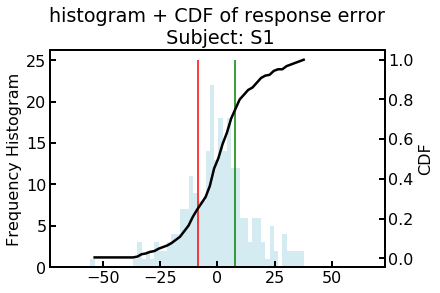

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


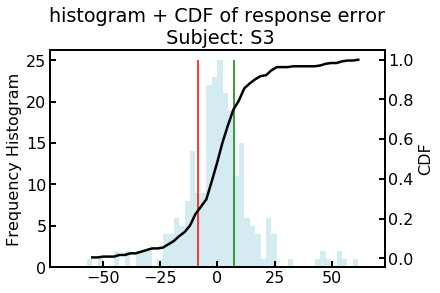

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


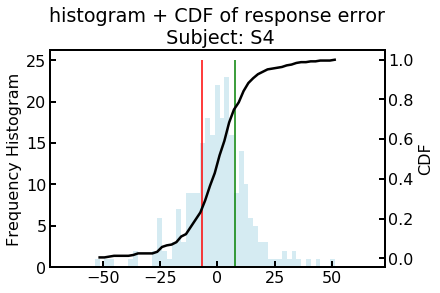

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


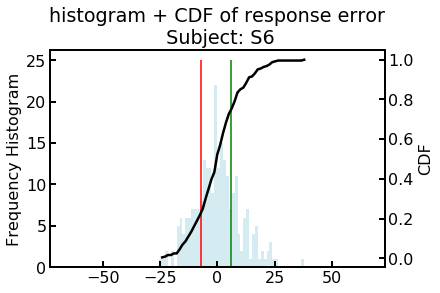

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


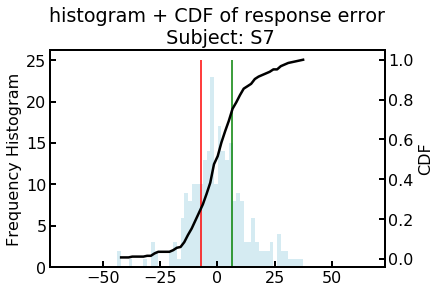

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


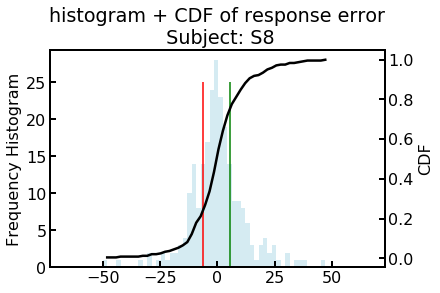

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


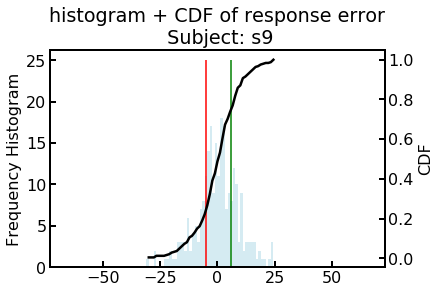

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


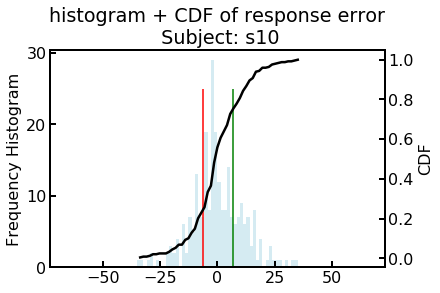

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


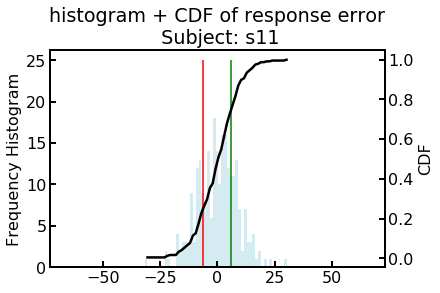

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


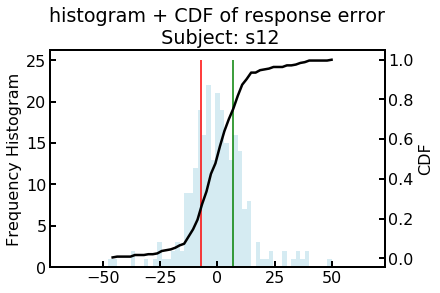

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


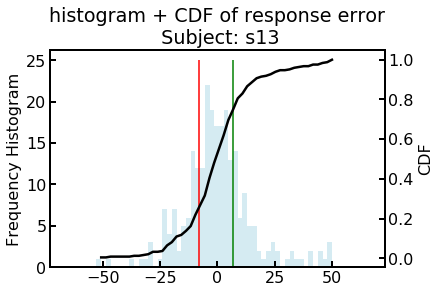

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


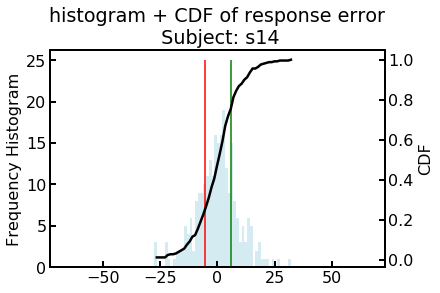

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


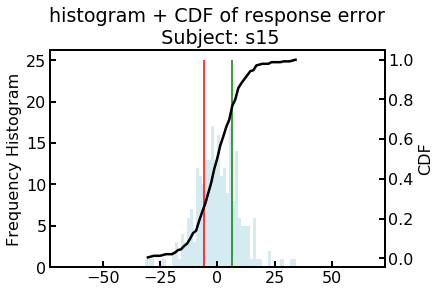

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


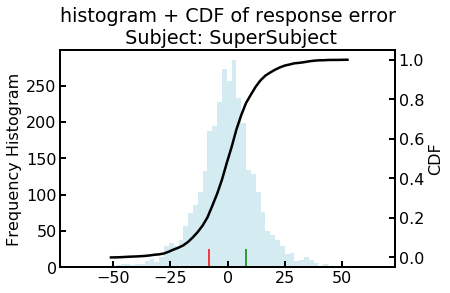

In [184]:
cdf_data = pd.DataFrame(columns=['SUBJECT','0TH','50TH'])

row = 0
for subject in subject_names:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata = subjectdata[(subjectdata['trialNumber'] >=1) & (subjectdata['trialNumber'] <=84)]

    cdf, cdf_percentile_25, cdf_percentile_75 = calculate_and_plot_cdf(subjectdata['responseError'], title=subject)
    cdf_data.loc[row,'SUBJECT'] = subject
    cdf_data.loc[row, 'JND_CR'] = (cdf_percentile_75- cdf_percentile_25)/2
    
    
    row += 1

Text(0.5, 1.0, 'Continuous Report Discrimination (CRD) per subject')

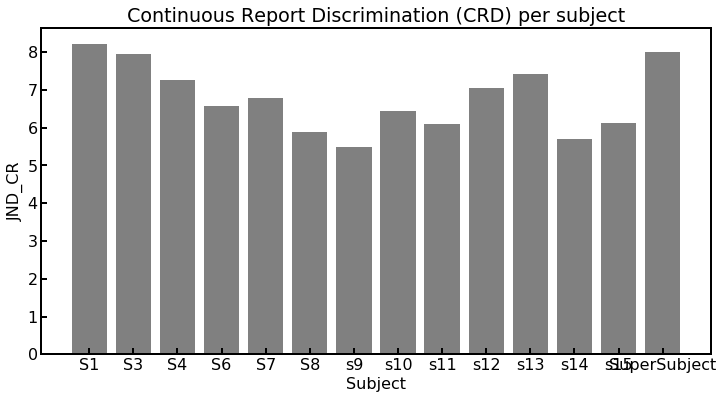

In [172]:
plt.figure(figsize=(12,6))
plt.bar(cdf_data['SUBJECT'],  cdf_data['JND_CR'], color='gray')
plt.ylabel('JND_CR')
plt.xlabel('Subject')
plt.title('Continuous Report Discrimination (CRD) per subject')

In [167]:
cdf.index

Float64Index([ -52.97402422811504, -50.268411921528006,   -48.7359444677227,
               -46.98099878281186,  -46.97126274826624,  -46.14450572723396,
                -45.0018409603509, -44.881720510874956, -44.402895683057935,
               -44.07626786535475,
              ...
                41.02597577188497,  41.316945052616404,   42.31070468207518,
               42.459176010378265,   42.98438096425392,   43.79560261483349,
               45.264064929183604,  48.264064929183604,   49.89291626307702,
               52.264064929183604],
             dtype='float64', length=2431)